# CNN_MNIST

In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization


Using TensorFlow backend.


### CNN with 3 layers

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history_1 = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11493376/11490434 [==============================] - 0s 0us/step


W0709 04:23:51.060149 140694541633408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0709 04:23:51.095492 140694541633408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0709 04:23:51.102290 140694541633408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0709 04:23:51.159436 140694541633408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0709 04:23:51.160586 1406945416

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


W0709 04:23:51.479045 140694541633408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0709 04:23:51.570933 140694541633408 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0709 04:23:51.604393 140694541633408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0709 04:23:52.012918 140694541633408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: Th

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 267s 4ms/step - loss: 0.4379 - acc: 0.8657 - val_loss: 0.1613 - val_acc: 0.9548
Epoch 2/12
60000/60000 [==============================] - 265s 4ms/step - loss: 0.1563 - acc: 0.9551 - val_loss: 0.0860 - val_acc: 0.9748
Epoch 3/12
60000/60000 [==============================] - 269s 4ms/step - loss: 0.1162 - acc: 0.9663 - val_loss: 0.0529 - val_acc: 0.9848
Epoch 4/12
60000/60000 [==============================] - 268s 4ms/step - loss: 0.0990 - acc: 0.9716 - val_loss: 0.0435 - val_acc: 0.9864
Epoch 5/12
60000/60000 [==============================] - 268s 4ms/step - loss: 0.0858 - acc: 0.9754 - val_loss: 0.0442 - val_acc: 0.9867
Epoch 6/12
60000/60000 [==============================] - 267s 4ms/step - loss: 0.0778 - acc: 0.9776 - val_loss: 0.0351 - val_acc: 0.9895
Epoch 7/12
60000/60000 [==============================] - 264s 4ms/step - loss: 0.0768 - acc: 0.9783 - val_loss: 0.0315 - 

In [0]:
import matplotlib.pyplot as plt
def plt_dynamic(x, vy, ty):
    plt.figure(figsize=(10,5))
    plt.plot(x, vy, 'b', label="Validation Loss")
    plt.plot(x, ty, 'r', label="Train Loss")
    plt.xlabel('Epochs') 
    plt.ylabel('Categorical Crossentropy Loss')
    plt.title('\nCategorical Crossentropy Loss VS Epochs')
    plt.legend()
    plt.grid()
    plt.show()

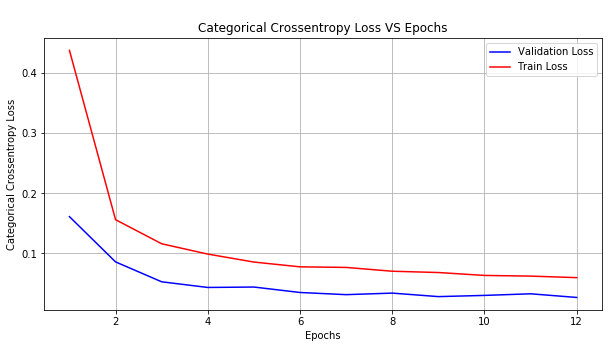

In [0]:
# Test and train accuracy of the model
model_test = score[1]
model_train = max(history_1.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,13))

# Validation loss
vy = history_1.history['val_loss']
# Training loss
ty = history_1.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

### CNN with 5 layers

In [0]:
model=Sequential()

model.add(Conv2D(64, kernel_size=(2, 2),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(1, 1)))

#Second layer
model.add(Conv2D(32,kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


#third layer
model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.5))



#Fourth Layer
model.add(Conv2D(64,kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))


#Fifth Layer
model.add(Conv2D(128,kernel_size=(5,5), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history_2 = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 262s 4ms/step - loss: 0.6133 - acc: 0.8031 - val_loss: 0.1166 - val_acc: 0.9647
Epoch 2/12
60000/60000 [==============================] - 260s 4ms/step - loss: 0.1773 - acc: 0.9468 - val_loss: 0.0536 - val_acc: 0.9834
Epoch 3/12
60000/60000 [==============================] - 262s 4ms/step - loss: 0.1269 - acc: 0.9614 - val_loss: 0.0428 - val_acc: 0.9862
Epoch 4/12
60000/60000 [==============================] - 262s 4ms/step - loss: 0.1068 - acc: 0.9669 - val_loss: 0.0528 - val_acc: 0.9847
Epoch 5/12
60000/60000 [==============================] - 263s 4ms/step - loss: 0.0975 - acc: 0.9715 - val_loss: 0.0471 - val_acc: 0.9854
Epoch 6/12
60000/60000 [==============================] - 265s 4ms/step - loss: 0.0878 - acc: 0.9738 - val_loss: 0.0462 - val_acc: 0.9871
Epoch 7/12
60000/60000 [==============================] - 265s 4ms/step - loss: 0.0799 - acc: 0.9762 - val_loss: 0.0285 - 

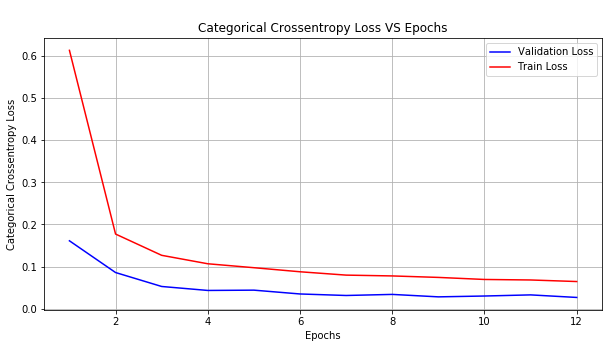

In [0]:
# Test and train accuracy of the model
model_test = score[1]
model_train = max(history_1.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,13))

# Validation loss
vy = history_1.history['val_loss']
# Training loss
ty = history_2.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

### CNN with 7 layers

In [0]:
model=Sequential()


#first layer
model.add(Conv2D(64, kernel_size=(2, 2),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(1, 1)))

#Second layer
model.add(Conv2D(64,kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


#third layer
model.add(Conv2D(32,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.5))



#Fourth Layer
model.add(Conv2D(32,kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#Fifth layer
model.add(Conv2D(16, kernel_size=(2, 2), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(1,1)))

#Sixth Layer
model.add(Conv2D(16,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#Seventh Layer
model.add(Conv2D(8,kernel_size=(3,3), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history_2 = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 227s 4ms/step - loss: 1.7556 - acc: 0.3464 - val_loss: 0.7449 - val_acc: 0.7471
Epoch 2/12
60000/60000 [==============================] - 224s 4ms/step - loss: 1.0674 - acc: 0.5835 - val_loss: 0.3702 - val_acc: 0.9296
Epoch 3/12
60000/60000 [==============================] - 225s 4ms/step - loss: 0.8326 - acc: 0.6735 - val_loss: 0.2098 - val_acc: 0.9520
Epoch 4/12
60000/60000 [==============================] - 224s 4ms/step - loss: 0.7163 - acc: 0.7237 - val_loss: 0.1333 - val_acc: 0.9632
Epoch 5/12
60000/60000 [==============================] - 225s 4ms/step - loss: 0.6444 - acc: 0.7504 - val_loss: 0.0961 - val_acc: 0.9729
Epoch 6/12
60000/60000 [==============================] - 224s 4ms/step - loss: 0.5991 - acc: 0.7723 - val_loss: 0.0831 - val_acc: 0.9758
Epoch 7/12
60000/60000 [==============================] - 225s 4ms/step - loss: 0.5623 - acc: 0.7903 - val_loss: 0.0799 - 

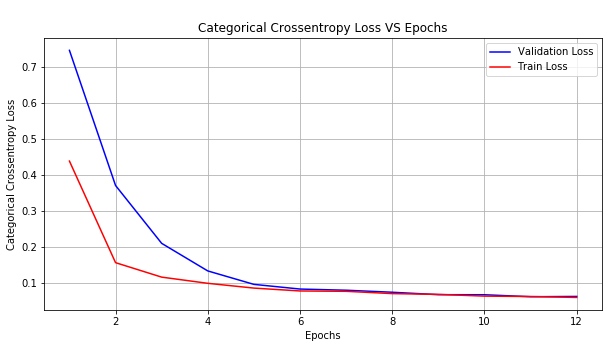

In [0]:
# Test and train accuracy of the model
model_test = score[1]
model_train = max(history_1.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,13))

# Validation loss
vy = history_2.history['val_loss']
# Training loss
ty = history_1.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

## Performance Table

In [0]:
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names = ["No of layers", "Accuracy %"]

x.add_row(["3","99.22"])
x.add_row(["5","99.12"])
x.add_row(["7","98.18"])



print(x)

+--------------+------------+
| No of layers | Accuracy % |
+--------------+------------+
|      3       |   99.22    |
|      5       |   99.12    |
|      7       |   98.18    |
+--------------+------------+


1. We applied  3 different   convolutional neural network

2. We used different kernel_size, max_pooling_size, batch narmalization and  drop out technique

3.  we can observe that after increasing number of layers our accuracy decreases.